In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30

In [86]:
HTS = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv", encoding = "cp949")
players = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv", encoding ="cp949")
batter_base = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv", encoding = "cp949")
team = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = "cp949")
score = pd.read_csv("01_제공데이터/19년득점타점.csv")

In [7]:
predict_name_list = ["양의지", "강백호", "최정", "이정후", "채은성", "김재환", "전준우", "김현수", "박건우", "로맥"]

In [8]:
print(HTS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33250 entries, 0 to 33249
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GYEAR        33250 non-null  int64  
 1   G_ID         33250 non-null  object 
 2   PIT_ID       33250 non-null  object 
 3   PCODE        33250 non-null  int64  
 4   T_ID         33250 non-null  object 
 5   INN          33250 non-null  int64  
 6   HIT_VEL      33250 non-null  float64
 7   HIT_ANG_VER  33250 non-null  float64
 8   HIT_RESULT   33250 non-null  object 
 9   PIT_VEL      33250 non-null  float64
 10  STADIUM      33250 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB
None


In [9]:
len(HTS["PIT_ID"].unique())

33002

In [10]:
HTS.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,33250.0,33250.000000,33250.000000,33250.000000,33250.000000,33250.000000
mean,2019.0,70601.132030,4.913263,133.957251,17.565919,135.608460
std,0.0,6313.158585,2.587957,20.045325,23.647591,9.198247
min,2019.0,60100.000000,1.000000,18.110000,-62.800000,85.590000
25%,2019.0,64346.000000,3.000000,122.190000,-1.200000,129.380000
50%,2019.0,69652.000000,5.000000,137.490000,14.600000,137.190000
75%,2019.0,76753.000000,7.000000,148.777500,32.000000,142.820000
max,2019.0,79705.000000,12.000000,180.810000,89.600000,157.020000


In [11]:
print(players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GYEAR     656 non-null    int64 
 1   PCODE     656 non-null    int64 
 2   NAME      656 non-null    object
 3   T_ID      656 non-null    object
 4   POSITION  656 non-null    object
 5   AGE_VA    656 non-null    int64 
 6   MONEY     656 non-null    object
dtypes: int64(3), object(4)
memory usage: 36.0+ KB
None


In [12]:
print(batter_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GYEAR    291 non-null    int64  
 1   PCODE    291 non-null    int64  
 2   GAMENUM  291 non-null    int64  
 3   PA       291 non-null    int64  
 4   AB       291 non-null    int64  
 5   BA       291 non-null    float64
 6   HIT      291 non-null    int64  
 7   HR       291 non-null    int64  
 8   TOTB     291 non-null    int64  
 9   SLG      291 non-null    float64
 10  SF       291 non-null    int64  
 11  BB       291 non-null    int64  
 12  KK       291 non-null    int64  
 13  IB       291 non-null    int64  
 14  HP       291 non-null    int64  
 15  GD       291 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 36.5 KB
None


In [13]:
print(len(list(players["PCODE"])))
print(len(list(HTS["PCODE"])))
print(len(list(batter_base["PCODE"])))
print("\n")

print(len(set(list(players["PCODE"]))))
print(len(set(list(HTS["PCODE"]))))
print(len(set(list(batter_base["PCODE"]))))
print("\n")


print(len(set(list(HTS["PCODE"])).intersection(set(list(players["PCODE"])))))
print(len(set(list(HTS["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print(len(set(list(players["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print("\n")

656
33250
291


656
281
291


281
281
291




In [93]:
PCODE = list(players["PCODE"])
NAME = list(players["NAME"])
AGE = list(players["AGE_VA"])

len(list(zip(PCODE, NAME)))
print(len(PCODE))
print(len(NAME))
print(len(AGE))

656
656
656


In [94]:
players_name_number = dict(list(zip(PCODE, NAME)))
players_age_number = dict(list(zip(PCODE, AGE)))

In [95]:
HTS["NAME"] = HTS["PCODE"].map(players_name_number)
batter_base["NAME"] = batter_base["PCODE"].map(players_name_number)


HTS["AGE_VA"] = HTS["PCODE"].map(players_age_number)
batter_base["AGE_VA"] = batter_base["PCODE"].map(players_age_number)

In [96]:
len(set(HTS["PCODE"]))

281

In [97]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2019,20190323HHOB0,190323_141330,76753,HH,1,132.99,72.6,파울플라이,135.50,잠실,송광민,36
1,2019,20190323HHOB0,190323_141717,68730,HH,1,146.08,4.7,1루타,137.97,잠실,호잉,30
2,2019,20190323HHOB0,190323_141942,71752,HH,1,116.93,2.9,1루타,143.43,잠실,김태균,37


In [98]:
HTS[HTS["PCODE"] == 60100]

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
3438,2019,20190411SKHH0,190411_195423,60100,HH,5,140.79,-2.1,땅볼아웃,142.83,대전,백창수,31
3503,2019,20190412HHWO0,190412_185747,60100,HH,2,154.92,33.5,플라이,144.35,고척,백창수,31
3527,2019,20190412HHWO0,190412_205518,60100,HH,8,91.29,83.1,파울플라이,128.34,고척,백창수,31
8876,2019,20190510HHLG0,190510_185623,60100,HH,3,140.66,50.2,플라이,140.74,잠실,백창수,31
8882,2019,20190510HHLG0,190510_192415,60100,HH,4,150.85,7.2,2루타,146.20,잠실,백창수,31
9127,2019,20190511HHLG0,190511_172050,60100,HH,2,135.91,59.9,플라이,124.89,잠실,백창수,31
9139,2019,20190511HHLG0,190511_180356,60100,HH,4,151.34,22.5,플라이,140.55,잠실,백창수,31
9373,2019,20190512HHLG0,190512_145157,60100,HH,3,156.98,-6.8,땅볼아웃,140.12,잠실,백창수,31
9803,2019,20190514WOHH0,190514_191208,60100,HH,2,157.47,15.1,플라이,139.09,대전,백창수,31
27825,2019,20190825OBHH0,190825_183044,60100,HH,5,145.04,30.3,플라이,145.09,대전,백창수,31


In [99]:
players.head(3)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2019,60100,백창수,HH,외,31,6000만원
1,2019,60140,신정락,HH,투,32,12000만원
2,2019,60146,이승현,SS,투,27,7000만원


In [100]:
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA
0,2019,60100,16,48,44,0.227,10,0,13,0.295,0,0,18,0,2,1,백창수,31
1,2019,60184,3,2,2,0.000,0,0,0,0.000,0,0,1,0,0,0,김창혁,28
2,2019,60288,8,13,13,0.231,3,0,4,0.308,0,0,6,0,0,1,김응민,27


In [101]:
team_dict = {
    "HH" : "한화",
    "HT" : "KIA",
    "KT" : "KT",
    "LG" : "LG",
    "LT" : "롯데",
    "NC" : "NC",
    "OB" : "두산",
    "SK" : "SSG",
    "SS" : "삼성",
    "WO" : "키움"
}

In [102]:
team_dict

{'HH': '한화',
 'HT': 'KIA',
 'KT': 'KT',
 'LG': 'LG',
 'LT': '롯데',
 'NC': 'NC',
 'OB': '두산',
 'SK': 'SSG',
 'SS': '삼성',
 'WO': '키움'}

In [103]:
HTS["T_ID"] = HTS["T_ID"].map(team_dict)
players["T_ID"] = players["T_ID"].map(team_dict)

In [104]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2019,20190323HHOB0,190323_141330,76753,한화,1,132.99,72.6,파울플라이,135.50,잠실,송광민,36
1,2019,20190323HHOB0,190323_141717,68730,한화,1,146.08,4.7,1루타,137.97,잠실,호잉,30
2,2019,20190323HHOB0,190323_141942,71752,한화,1,116.93,2.9,1루타,143.43,잠실,김태균,37


C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


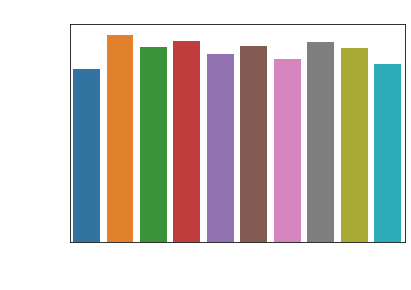

In [133]:
sns.countplot(HTS.T_ID)
plt.xticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.yticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.xlabel("팀이름", color = "w", fontsize = 15)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("팀별경기수", color = "w", fontsize = 15)

plt.show()

In [23]:
HTS.HIT_VEL.describe()

count    33250.000000
mean       133.957251
std         20.045325
min         18.110000
25%        122.190000
50%        137.490000
75%        148.777500
max        180.810000
Name: HIT_VEL, dtype: float64

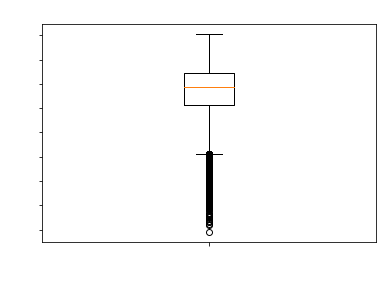

In [24]:
plt.boxplot(HTS.HIT_VEL)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("타구속도", color = "w", fontsize = 15)
plt.show()

In [55]:
HTS.HIT_VEL.describe()

count    33250.000000
mean       133.957251
std         20.045325
min         18.110000
25%        122.190000
50%        137.490000
75%        148.777500
max        180.810000
Name: HIT_VEL, dtype: float64

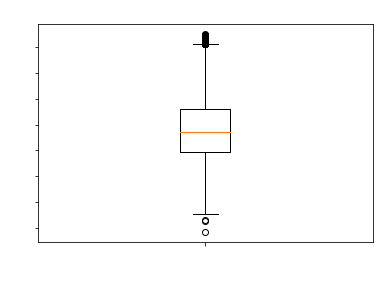

In [25]:
plt.boxplot(HTS.HIT_ANG_VER)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("발사각도", color = "w", fontsize = 15)
plt.show()

In [26]:
HTS.HIT_ANG_VER.describe()

count    33250.000000
mean        17.565919
std         23.647591
min        -62.800000
25%         -1.200000
50%         14.600000
75%         32.000000
max         89.600000
Name: HIT_ANG_VER, dtype: float64

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


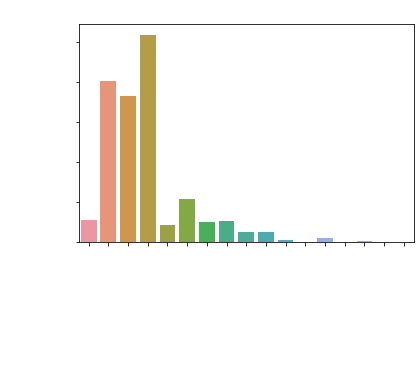

In [27]:
sns.countplot(HTS.HIT_RESULT)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("타격결과", color = "w", fontsize = 15)
plt.show()

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


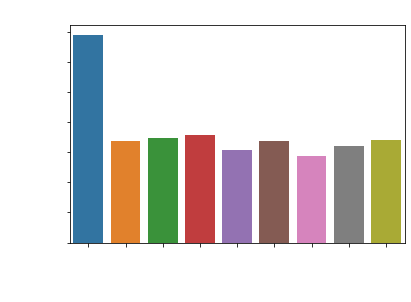

In [28]:
sns.countplot(HTS.STADIUM)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("구장별경기수", color = "w", fontsize = 15)
plt.show()

Text(0.5, 1.0, '타구속도 별 발사각도')

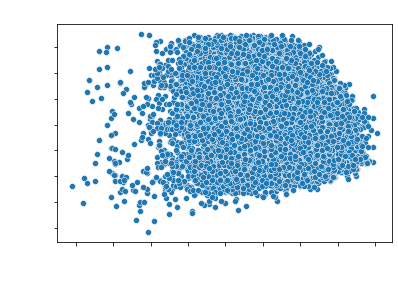

In [29]:
sns.scatterplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 발사각도')

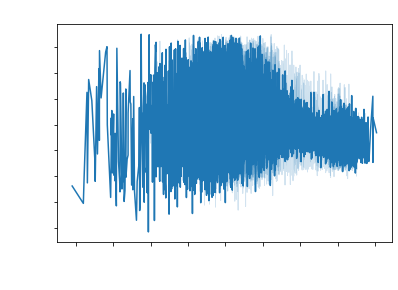

In [30]:
sns.lineplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

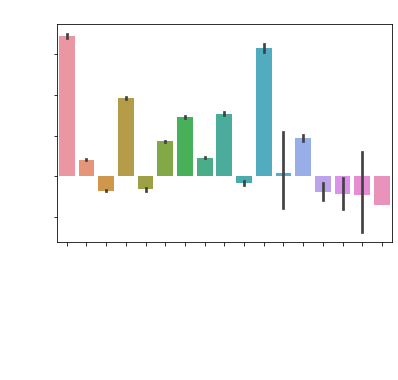

In [31]:
sns.barplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

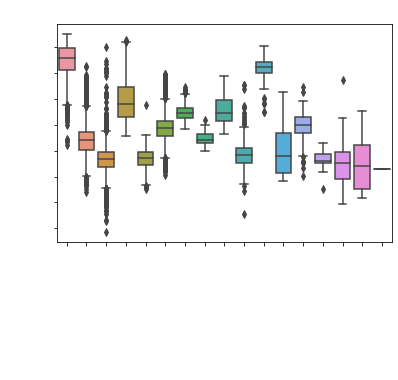

In [32]:
sns.boxplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

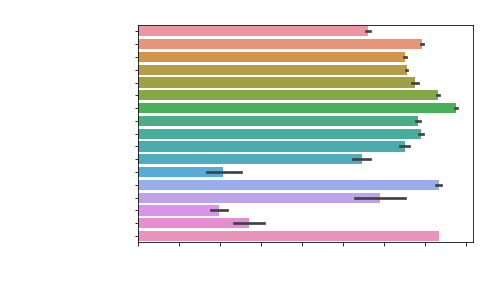

In [33]:
sns.barplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

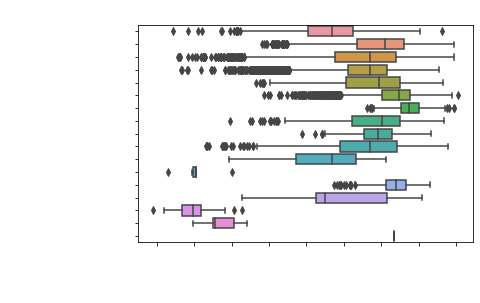

In [34]:
sns.boxplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

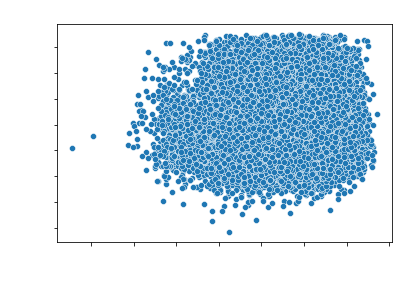

In [35]:
sns.scatterplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

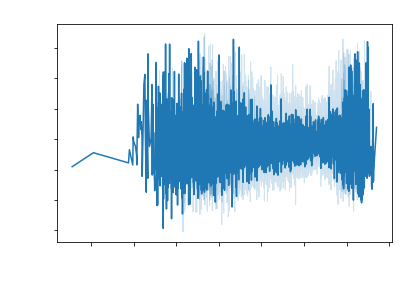

In [36]:
sns.lineplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

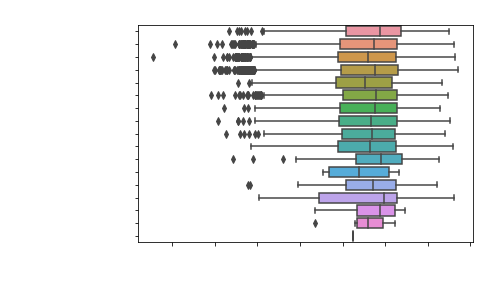

In [37]:
sns.boxplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

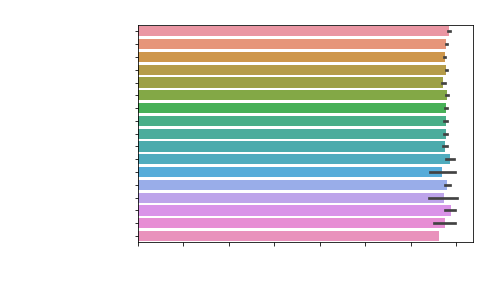

In [38]:
sns.barplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 타구속도')

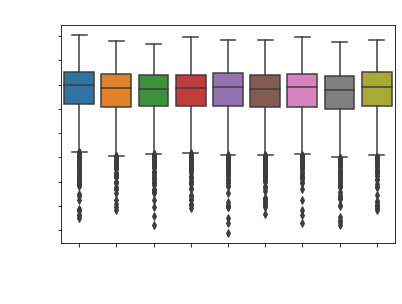

In [39]:
sns.boxplot( x = "STADIUM", y = "HIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 타구속도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 발사각도')

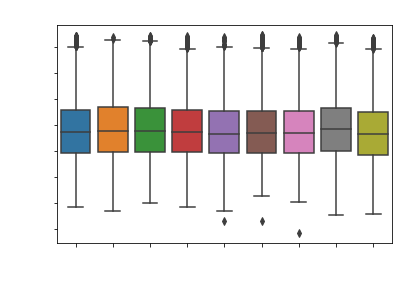

In [40]:
sns.boxplot( x = "STADIUM", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("구장 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 상대투수투구구속')

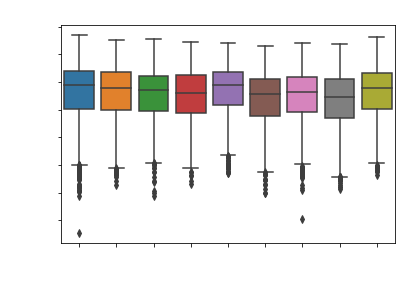

In [41]:
sns.boxplot( x = "STADIUM", y = "PIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("PIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 상대투수투구구속", color = "w", fontsize = 15)


In [42]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_ANG_VER")

In [43]:
pivot

HIT_RESULT,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,번트아웃,번트안타,병살타,삼중살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생번트,희생플라이
STADIUM,,,,,,,,,,,,,,,,,
고척,7.058115,17.396016,17.188372,-5.839216,-7.497875,-23.40,30.80,-6.750000,NaN,-5.183333,64.483333,8.954545,67.860000,38.061630,29.630667,-1.250000,31.164865
광주,7.790665,17.710465,22.147826,-3.921311,-6.754861,1.90,NaN,-7.018681,NaN,-8.700000,60.655556,8.735366,69.193277,38.440018,28.751724,-21.000000,31.470690
대구,8.053453,17.887137,19.748148,-0.765714,-6.455892,NaN,-15.85,-5.901220,NaN,NaN,60.800000,9.841346,69.592982,39.467757,29.040141,-3.850000,31.275472
대전,8.067672,16.634848,20.807692,-3.279545,-7.195497,NaN,NaN,-5.207042,NaN,-14.950000,60.171429,8.810112,65.203614,37.634146,29.341026,-8.233333,28.928205
문학,8.949694,15.561140,13.083333,-2.215625,-7.568750,17.40,-30.30,-6.875309,NaN,NaN,60.787500,9.479245,66.858824,40.082817,29.784286,-2.800000,30.406452
사직,7.631070,17.653521,21.592857,-0.926230,-7.038889,44.80,NaN,-5.605797,NaN,NaN,60.418182,8.610204,69.847423,39.141031,29.921495,-6.620000,32.378947
수원,8.625663,18.401075,20.429412,-3.550000,-6.868627,-14.65,3.50,-7.452688,NaN,-1.450000,67.077778,9.532540,73.410989,38.597446,27.961628,-13.000000,32.363265
잠실,8.608474,17.106634,18.338298,-3.665000,-6.678715,NaN,-26.70,-6.621212,-13.9,-9.400000,66.182353,8.749485,68.962000,37.359097,28.384507,-18.225000,30.012931
창원,7.938272,16.258411,17.695652,-2.750000,-6.371742,NaN,NaN,-5.436000,NaN,NaN,63.815385,10.550000,68.816260,38.481827,29.538583,-19.200000,30.593103


Text(0.5, 1.0, '구장 별 타격결과 발사각도')

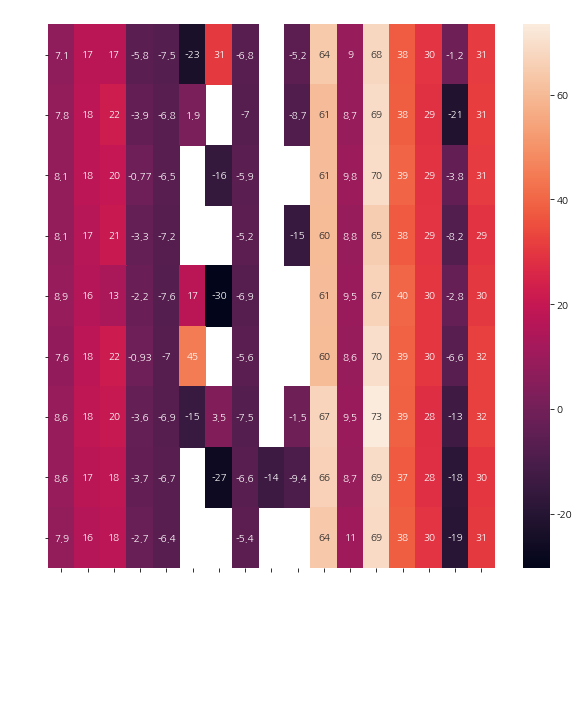

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 발사각도", color = "w", fontsize = 15)

In [45]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_VEL")

Text(0.5, 1.0, '구장 별 타격결과 타구속도')

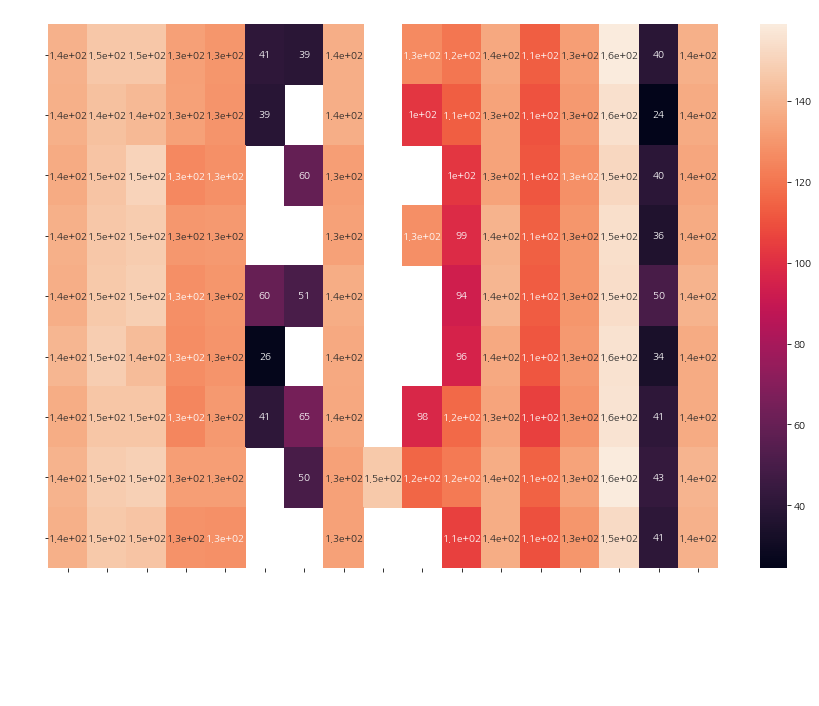

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 타구속도", color = "w", fontsize = 15)

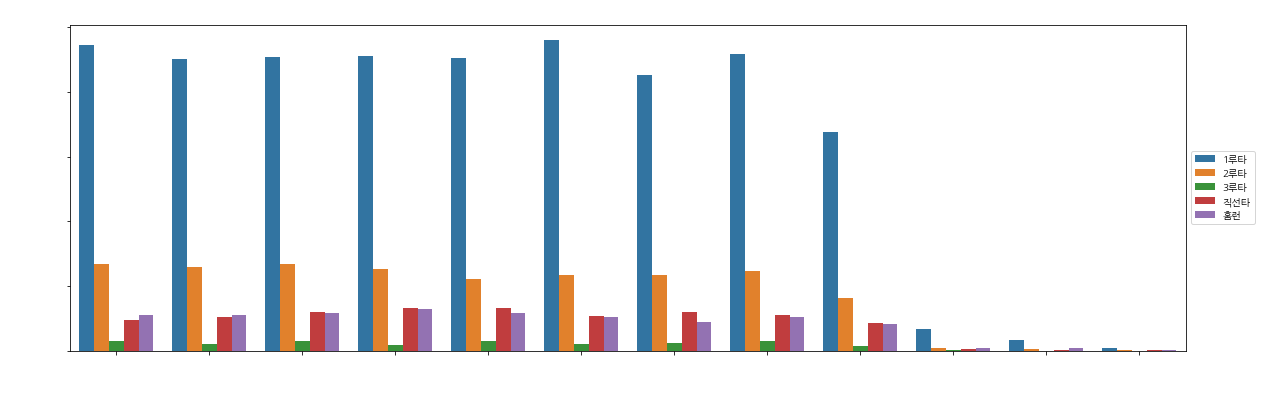

In [58]:
a = pd.DataFrame(HTS.groupby(["INN","HIT_RESULT"])["HIT_RESULT"].count())
a = a.rename(columns = {"HIT_RESULT" : "count"}).reset_index()
b = a[(a["HIT_RESULT"] == "1루타") | (a["HIT_RESULT"] == "2루타") | (a["HIT_RESULT"] == "3루타") | (a["HIT_RESULT"] == "홈런") | (a["HIT_RESULT"] == "직선타")]

plt.figure(figsize = (20,6))
sns.barplot(x = "INN", y = "count", data = b, hue = "HIT_RESULT")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("INN", fontsize = 15, color = "w")
plt.ylabel("COUNT", fontsize = 15, color = "w")
plt.title("19년 이닝별결과", color = "w", fontsize = 15)
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))


In [59]:
b.groupby(["HIT_RESULT"])["count"].sum()

HIT_RESULT
1루타    8083
2루타    2161
3루타     219
직선타    1026
홈런      984
Name: count, dtype: int64

In [105]:
HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()
HIT_VEL_ANG_mean.loc[["홈런","1루타","2루타","3루타","직선타"]]

<ipython-input-105-2157134e4bc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()


,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
홈런,155.013750,29.160671
1루타,138.475712,8.134505
2루타,146.336853,17.199445
3루타,146.632831,18.847945
직선타,136.508382,9.266959


In [106]:
HIT_VEL_ANG_mean.loc[:]

,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
1루타,138.475712,8.134505
2루타,146.336853,17.199445
3루타,146.632831,18.847945
내야안타(1루타),129.935922,-3.172549
땅볼아웃,130.111636,-6.913746
번트아웃,41.348333,1.900000
번트안타,53.958333,-9.066667
병살타,135.093930,-6.376442
삼중살타,146.550000,-13.900000


In [107]:
# 출루율 공식 (안타+사사구)÷(타수+사사구+희생플라이)

# batter_base 새로운 컬럼 추가(출루율)

batter_base["OBP"] = (batter_base["HIT"] + batter_base["BB"] + batter_base["HP"]) / (batter_base["AB"] + batter_base["BB"] + batter_base["HP"] + batter_base["SF"])
batter_base["OPS"] = batter_base["OBP"] + batter_base["SLG"]
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2019,60100,16,48,44,0.227,10,0,13,0.295,0,0,18,0,2,1,백창수,31,0.260870,0.555870
1,2019,60184,3,2,2,0.000,0,0,0,0.000,0,0,1,0,0,0,김창혁,28,0.000000,0.000000
2,2019,60288,8,13,13,0.231,3,0,4,0.308,0,0,6,0,0,1,김응민,27,0.230769,0.538769


Text(0.5, 1.0, '19년 타수별 OPS')

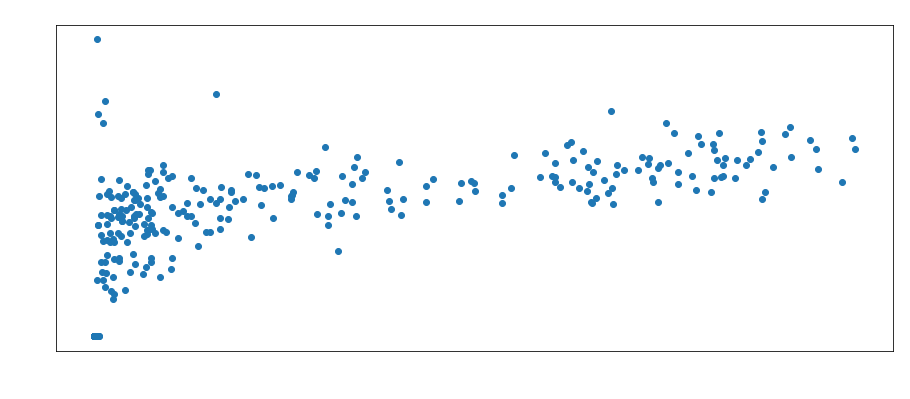

In [67]:
plt.figure(figsize=(15,6))
plt.plot("AB", "OPS", data = batter_base, marker = "o", linestyle = "none")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("AB", fontsize = 15, color = "w")
plt.ylabel("OPS", fontsize = 15, color = "w")
plt.title("19년 타수별 OPS", color = "w", fontsize = 15)

In [108]:
# OPS 이상치 탐색을 위한 수치 정의

Q1 = batter_base["OPS"].quantile(0.25)
Q3 = batter_base["OPS"].quantile(0.75)
IQR = Q3 - Q1
# 실제 OPS 이상치 탐색

batter_base.loc[(batter_base["OPS"] < (Q1 - 1.5 * IQR)) | (batter_base["OPS"] > (Q3 + 1.5 * IQR))].sort_values(by = ["AB"], axis = 0, ascending = False)


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
53,2019,62947,23,106,93,0.366,34,4,60,0.645,0,12,26,0,1,2,나성범,29,0.443396,1.088396
45,2019,62893,4,5,5,0.000,0,0,0,0.000,0,0,2,0,0,0,최정민,30,0.000000,0.000000
146,2019,67123,8,5,5,0.000,0,0,0,0.000,0,0,1,0,0,0,전준호,21,0.000000,0.000000
71,2019,63903,3,4,4,0.000,0,0,0,0.000,0,0,1,0,0,0,유영준,24,0.000000,0.000000
121,2019,65869,2,3,3,0.000,0,0,0,0.000,0,0,0,0,0,0,이현석,27,0.000000,0.000000
104,2019,64803,6,3,3,0.667,2,0,2,0.667,0,0,1,0,0,0,임재현,28,0.666667,1.333667
39,2019,62668,2,3,3,0.000,0,0,0,0.000,0,0,1,0,0,0,윤해진,30,0.000000,0.000000
126,2019,66203,7,3,3,0.000,0,0,0,0.000,0,0,0,0,0,0,서예일,26,0.000000,0.000000
179,2019,69203,2,2,2,0.000,0,0,0,0.000,0,0,1,0,0,0,송승환,18,0.000000,0.000000
173,2019,68906,2,2,2,0.000,0,0,0,0.000,0,0,0,0,0,0,김철호,21,0.000000,0.000000


In [69]:
HTS.head()

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2019,20190323HHOB0,190323_141330,76753,NaN,1,132.99,72.6,파울플라이,135.50,잠실,송광민,36
1,2019,20190323HHOB0,190323_141717,68730,NaN,1,146.08,4.7,1루타,137.97,잠실,호잉,30
2,2019,20190323HHOB0,190323_141942,71752,NaN,1,116.93,2.9,1루타,143.43,잠실,김태균,37
3,2019,20190323HHOB0,190323_142111,73136,NaN,1,135.10,-2.5,땅볼아웃,138.24,잠실,이성열,34
4,2019,20190323HHOB0,190323_142928,79215,NaN,1,151.58,26.3,플라이,145.88,잠실,박건우,28


# 배럴 타구 정의

In [70]:
# Barrel_Hit 함수 정의

# Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2)

def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2):
    df_copy = df.copy()
    df_copy = df_copy[
                                    (df_copy["HIT_VEL"] >= HIT_VEL) & \
                                    (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) & \
                                    (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2).reset_index(drop = True)]
                                    
    # 장타율 계산

    # 분모 : 타수 => 행 길이
    #print("장타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4
    
    temp = pd.Series(data = [0,0,0,0], index = ["1루타", "2루타", "3루타", "홈런"])
    
    for i in df_copy["HIT_RESULT"].value_counts().keys():
        temp[i] = df_copy["HIT_RESULT"].value_counts()[i]

    numerator = (temp["1루타"] * 1) + (temp["2루타"] * 2) + \
                (temp["3루타"] * 3) + (temp["홈런"] * 4)

    #print("분자 : {}".format(numerator))

    # 장타율
    OBP = numerator / denominator
    #print("장타율 : " , OBP)

    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #print("-" * 50)
    # 타율 계산


    # 분모 : 티수 => 행 길이
    #print("타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
    numerator = (temp["1루타"] + temp["2루타"] + \
                temp["3루타"] + temp["홈런"])

    #print("분자 : {}".format(numerator))

    # 타율

    avg = numerator / denominator
    #print("타율" , avg)
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    Barrel = (OBP / 1.5) * (avg / 0.5)
    
    #print(Barrel)
    
    dictionary = {"장타율" : OBP,
                  "타율" : avg,
                  "Barrel" : Barrel}
    return dictionary
    
    #print(dictionary)

In [89]:
Barrel_Hit(HTS, 140,20,30)

{'장타율': 1.4921108742004265,
 '타율': 0.4976545842217484,
 'Barrel': 0.9900744222839504}

# 동명이인 처리

In [91]:
score["선수명"].value_counts() #이명기, 김민수, 이우성

이명기    2
김민수    2
이우성    2
샌즈     1
전민수    1
      ..
류승현    1
김인태    1
박찬호    1
고종욱    1
박해민    1
Name: 선수명, Length: 207, dtype: int64

In [112]:
batter_base["PCODE"].value_counts().sort_values(ascending= False)   #이명기 76849, 김민수 64793, 67504, 이우성 63260, 이명기 62득점 36타점, 이우성 19득점 22타점

76290    1
69418    1
79365    1
64006    1
64007    1
        ..
64501    1
64504    1
73209    1
69100    1
73213    1
Name: PCODE, Length: 291, dtype: int64

In [170]:
#KBReport 선수기록
score_name = list(score["선수명"])
score_R = list(score["득점"])
score_RBI = list(score["타점"])

score_name_R = dict(list(zip(score_name, score_R)))
score_name_RBI = dict(list(zip(score_name, score_RBI)))


HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
HTS_grouped_PCODE = HTS_grouped_PCODE.reset_index()

HTS_grouped_PCODE["R"] = pd.Series()
HTS_grouped_PCODE["RBI"] = pd.Series()
HTS_grouped_PCODE["NAME"] = pd.Series()

HTS_grouped_PCODE["NAME"] = HTS_grouped_PCODE["PCODE"].map(players_name_number)
HTS_grouped_PCODE["R"] = HTS_grouped_PCODE["NAME"].map(score_name_R).apply(lambda x : 0 if pd.isnull(x) else x)
HTS_grouped_PCODE["RBI"] = HTS_grouped_PCODE["NAME"].map(score_name_RBI).apply(lambda x : 0 if pd.isnull(x) else x)

HTS_grouped_PCODE = HTS_grouped_PCODE[(HTS_grouped_PCODE["R"] != 0) | HTS_grouped_PCODE["RBI"] != 0].reset_index(drop = True)

print(HTS_grouped_PCODE)

     PCODE  HIT_VEL  HIT_ANG_VER     R   RBI NAME
0    60100  146.370         15.7   4.0   3.0  백창수
1    60523  138.290         14.1  26.0  17.0   정훈
2    60558  137.330         14.1  63.0  35.0  오태곤
3    60566  130.800          7.1  30.0  12.0  이상호
4    61102  144.210         16.1  44.0  49.0  유강남
..     ...      ...          ...   ...   ...  ...
204  79456  132.250          3.7  40.0  39.0  이지영
205  79465  139.405         18.7   5.0   7.0  배영섭
206  79530  128.050          8.4   1.0   5.0  양종민
207  79608  138.800          9.5  45.0  49.0  안치홍
208  79705  134.800         27.1   7.0  18.0  김회성

[209 rows x 6 columns]


<ipython-input-170-f9d765c6c55c>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
<ipython-input-170-f9d765c6c55c>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["R"] = pd.Series()
<ipython-input-170-f9d765c6c55c>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["RBI"] = pd.Series()
<ipython-input-170-f9d765c6c55c>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["NAME"] = pd.Series()


In [171]:
HTS_grouped_PCODE["NAME"].value_counts()

김재현    2
이원석    2
김민수    2
박계범    1
장진혁    1
      ..
류승현    1
김인태    1
박찬호    1
고종욱    1
박해민    1
Name: NAME, Length: 206, dtype: int64

In [172]:
HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "이명기") | (HTS_grouped_PCODE["NAME"] == "이우성")]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME
41,63260,142.67,11.1,7.0,10.0,이우성
170,76849,133.46,9.7,37.0,21.0,이명기


In [173]:
HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "김민수")]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME
71,64793,122.835,18.6,5.0,2.0,김민수
98,67504,134.200,16.8,5.0,2.0,김민수


In [174]:
# 이우성, 이명기 , 김민수(동명이인)처리

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

HTS_grouped_PCODE.loc[41, "R"] = 62
HTS_grouped_PCODE.loc[41, "RBI"] = 36

HTS_grouped_PCODE.loc[170, "R"] = 19
HTS_grouped_PCODE.loc[170, "RBI"] = 22

HTS_grouped_PCODE.loc[98, "R"] = 0
HTS_grouped_PCODE.loc[98, "RBI"] = 1

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

print(HTS_grouped_PCODE["PCODE"].value_counts())


76802    1
78603    1
79198    1
62409    1
72546    1
        ..
78513    1
65207    1
69825    1
64300    1
73213    1
Name: PCODE, Length: 209, dtype: int64


In [175]:
# final_batter_base는 batter_base에 타점,득점, 타구속도, 발사각도 추가 



final_batter_base = batter_base.copy()
final_batter_base = final_batter_base[final_batter_base["AB"] > 30]
final_batter_base["R"] = pd.Series()
final_batter_base["RBI"] = pd.Series()
final_batter_base["HIT_VEL"] = pd.Series()
final_batter_base["HIT_ANG_VER"] = pd.Series()

final_batter_base



<ipython-input-175-78fc6683b67f>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["R"] = pd.Series()
<ipython-input-175-78fc6683b67f>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["RBI"] = pd.Series()
<ipython-input-175-78fc6683b67f>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL"] = pd.Series()
<ipython-input-175-78fc6683b67f>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG_VER"] = pd.Series()


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,HP,GD,NAME,AGE_VA,OBP,OPS,R,RBI,HIT_VEL,HIT_ANG_VER
0,2019,60100,16,48,44,0.227,10,0,13,0.295,...,2,1,백창수,31,0.260870,0.555870,NaN,NaN,NaN,NaN
3,2019,60343,30,43,40,0.125,5,0,5,0.125,...,1,0,이해창,32,0.186047,0.311047,NaN,NaN,NaN,NaN
4,2019,60523,88,222,190,0.226,43,2,55,0.289,...,5,4,정훈,31,0.324201,0.613201,NaN,NaN,NaN,NaN
5,2019,60558,123,392,352,0.250,88,6,124,0.352,...,4,8,오태곤,27,0.316195,0.668195,NaN,NaN,NaN,NaN
6,2019,60566,102,256,234,0.278,65,0,72,0.308,...,2,10,이상호,30,0.306452,0.614452,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2019,79456,106,331,308,0.282,87,1,97,0.315,...,1,14,이지영,33,0.316923,0.631923,NaN,NaN,NaN,NaN
287,2019,79465,30,80,71,0.225,16,0,17,0.239,...,2,0,배영섭,33,0.300000,0.539000,NaN,NaN,NaN,NaN
288,2019,79530,18,49,44,0.136,6,0,8,0.182,...,0,3,양종민,28,0.170213,0.352213,NaN,NaN,NaN,NaN
289,2019,79608,105,408,362,0.315,114,5,149,0.412,...,1,9,안치홍,29,0.379902,0.791902,NaN,NaN,NaN,NaN


In [176]:
HTS_grouped_PCODE_PCODE = list(HTS_grouped_PCODE["PCODE"])
HTS_grouped_PCODE_NAME = list(HTS_grouped_PCODE["NAME"])
HTS_grouped_PCODE_HIT_VEL = list(HTS_grouped_PCODE["HIT_VEL"])
HTS_grouped_PCODE_HIT_ANG_VER = list(HTS_grouped_PCODE["HIT_ANG_VER"])
HTS_grouped_PCODE_R = list(HTS_grouped_PCODE["R"])
HTS_grouped_PCODE_RBI = list(HTS_grouped_PCODE["RBI"])

In [177]:
HTS_PCODE_HIT_VEL = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_VEL)))
HTS_PCODE_HIT_ANG_VER = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_ANG_VER)))
HTS_PCODE_R = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_R)))
HTS_PCODE_RBI = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_RBI)))

In [178]:
final_batter_base["R"] = final_batter_base["PCODE"].map(HTS_PCODE_R).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["RBI"] = final_batter_base["PCODE"].map(HTS_PCODE_RBI).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_VEL"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_VEL).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_ANG_VER"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_ANG_VER).apply(lambda x : 0 if pd.isnull(x) else x)

final_batter_base = HTS_grouped_PCODE.merge(final_batter_base, on =["PCODE","HIT_VEL","HIT_ANG_VER","R","RBI","NAME"])

In [179]:
final_batter_base

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS
0,60100,146.370,15.7,4.0,3.0,백창수,2019,16,48,44,...,0.295,0,0,18,0,2,1,31,0.260870,0.555870
1,60523,138.290,14.1,26.0,17.0,정훈,2019,88,222,190,...,0.289,1,23,47,1,5,4,31,0.324201,0.613201
2,60558,137.330,14.1,63.0,35.0,오태곤,2019,123,392,352,...,0.352,2,31,78,0,4,8,27,0.316195,0.668195
3,60566,130.800,7.1,30.0,12.0,이상호,2019,102,256,234,...,0.308,3,9,22,0,2,10,30,0.306452,0.614452
4,61102,144.210,16.1,44.0,49.0,유강남,2019,132,468,418,...,0.438,6,30,82,2,13,21,26,0.334047,0.772047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,79456,132.250,3.7,40.0,39.0,이지영,2019,106,331,308,...,0.315,1,15,28,1,1,14,33,0.316923,0.631923
197,79465,139.405,18.7,5.0,7.0,배영섭,2019,30,80,71,...,0.239,1,6,15,0,2,0,33,0.300000,0.539000
198,79530,128.050,8.4,1.0,5.0,양종민,2019,18,49,44,...,0.182,1,2,15,0,0,3,28,0.170213,0.352213
199,79608,138.800,9.5,45.0,49.0,안치홍,2019,105,408,362,...,0.412,5,40,37,1,1,9,29,0.379902,0.791902


In [200]:
final_batter_base[["BA", "SLG","R","RBI"]].corr()

,BA,SLG,R,RBI
BA,1.000000,0.809884,0.643793,0.620310
SLG,0.809884,1.000000,0.632402,0.727691
R,0.643793,0.632402,1.000000,0.878613
RBI,0.620310,0.727691,0.878613,1.000000


In [180]:
final_batter_base[(final_batter_base["OBP"] == 0) | (final_batter_base["OPS"] == 0)]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [181]:
final_batter_base[final_batter_base["AB"] < 30]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [182]:
final_batter_base.to_csv("./final19.csv", index =False)

In [183]:
Barrel_Hit(HTS, 145, 15,28)

{'장타율': 1.4264884568651275,
 '타율': 0.555690562980964,
 'Barrel': 1.056914898241639}

In [190]:
#HTS_123H = HTS[(HTS["HIT_RESULT"] == "1루타") | (HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]
#HTS_23H = HTS[(HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]




final_batter_base["HIT_ANG25"] = pd.Series()
final_batter_base["HIT_ANG75"] = pd.Series()
final_batter_base["HIT_ANG50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_ANG25 = []
HIT_ANG75 = []
HIT_ANG50 = []

for i in final_batter_base_name :
    HIT_ANG25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_ANG_VER"])
    HIT_ANG75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_ANG_VER"])
    HIT_ANG50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_ANG_VER"])

    
NAME_HIT_ANG25 = dict(list(zip(final_batter_base_name, HIT_ANG25)))
NAME_HIT_ANG75 = dict(list(zip(final_batter_base_name, HIT_ANG75)))
NAME_HIT_ANG50 = dict(list(zip(final_batter_base_name, HIT_ANG50)))

final_batter_base["HIT_ANG25"] = final_batter_base["NAME"].map(NAME_HIT_ANG25)
final_batter_base["HIT_ANG75"] = final_batter_base["NAME"].map(NAME_HIT_ANG75)
final_batter_base["HIT_ANG50"] = final_batter_base["NAME"].map(NAME_HIT_ANG50)

final_batter_base["Barrel"] = pd.Series()

for i in range(final_batter_base.shape[0]):
    final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]

<ipython-input-190-6267ac9dbfb8>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG25"] = pd.Series()
<ipython-input-190-6267ac9dbfb8>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG75"] = pd.Series()
<ipython-input-190-6267ac9dbfb8>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG50"] = pd.Series()
<ipython-input-190-6267ac9dbfb8>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["Barrel"] = pd.Series()
<ipyth

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-190-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [186]:
final_batter_base["HIT_VEL25"] = pd.Series()
final_batter_base["HIT_VEL75"] = pd.Series()
final_batter_base["HIT_VEL50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_VEL25 = []
HIT_VEL75 = []
HIT_VEL50 = []

for i in final_batter_base_name :
    HIT_VEL25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_VEL"])
    HIT_VEL75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_VEL"])
    HIT_VEL50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_VEL"])

    
NAME_HIT_VEL25 = dict(list(zip(final_batter_base_name, HIT_VEL25)))
NAME_HIT_VEL75 = dict(list(zip(final_batter_base_name, HIT_VEL75)))
NAME_HIT_VEL50 = dict(list(zip(final_batter_base_name, HIT_VEL50)))

final_batter_base["HIT_VEL25"] = final_batter_base["NAME"].map(NAME_HIT_VEL25)
final_batter_base["HIT_VEL75"] = final_batter_base["NAME"].map(NAME_HIT_VEL75)
final_batter_base["HIT_VEL50"] = final_batter_base["NAME"].map(NAME_HIT_VEL50)

<ipython-input-186-aa522e9287dc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL25"] = pd.Series()
<ipython-input-186-aa522e9287dc>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL75"] = pd.Series()
<ipython-input-186-aa522e9287dc>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL50"] = pd.Series()


In [191]:
final_batter_base.corr()[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
PCODE,0.153510,0.191819,0.186925
HIT_VEL,0.514852,0.578280,0.584326
HIT_ANG_VER,-0.096921,0.155109,0.062844
R,0.665115,0.632402,0.679792
RBI,0.651949,0.727691,0.736925
GYEAR,NaN,NaN,NaN
GAMENUM,0.567471,0.483617,0.543362
PA,0.647491,0.608834,0.657320
AB,0.632237,0.602247,0.646912
BA,0.879562,0.809884,0.881673


In [185]:
final_batter_base.corr()[["SLG", "OBP","OPS"]].loc["Barrel"]

SLG    0.595460
OBP    0.484884
OPS    0.583602
Name: Barrel, dtype: float64

In [194]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    140.61
50%    149.35
75%    155.44
Name: HIT_VEL, dtype: float64

In [195]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    11.6
50%    17.6
75%    23.0
Name: HIT_ANG_VER, dtype: float64

In [196]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    142.385
50%    147.760
75%    153.280
Name: HIT_VEL, dtype: float64

In [197]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    13.85
50%    20.10
75%    25.65
Name: HIT_ANG_VER, dtype: float64

In [198]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    150.265
50%    155.040
75%    159.960
Name: HIT_VEL, dtype: float64

In [199]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

25%    25.3
50%    28.8
75%    32.7
Name: HIT_ANG_VER, dtype: float64